PyNE Tutorial
=============

Welcome to the PyNE tutorial! 

![PyNE Tree](https://raw.github.com/pyne/pyne/develop/img/pyne_icon_big.png)


# Before you begin
* Hopefully you've installed the virtual machine if necessary. 
    - If not, please go to http://pyne.io/install/vb.html#vb to install a virtual machine.
    - If so, open it now and open Accessories -> LXTerminal, navigate to ~/opt/pyne

# Is PyNE Installed?

You can verify that PyNE is successfully installed by running the following: 


In [1]:
from pyne import data
print(data.atomic_mass('U235'))

235.04392819


# Open the tutorial

You can start the tutorial by navigating to `~/opt/pyne/tutorial` and entering

```bash
$ jupyter notebook --matplotlib=inline
```

This should open the tutorial in a web browser. We'll start with `00-intro`.

# What is PyNE?

As our tagline says, PyNE is the open source nuclear engineering toolkit.  

* PyNE is intended as a library of composable tools that is used to build nuclear science and engineering applications.
* It is permissively licensed (2-clause BSD).
* It supports both a C++ and a Python API.
* The name 'PyNE' is a bit of a misnomer since most of the code base is in C++ but most daily usage happens in Python.
* The v0.5 code is the current stable release.
* As an organization, PyNE was born in April 2011.  However, core parts of PyNE have existed since 2007.

# What are the goals of PyNE?

To help nuclear engineers:

* be more productive,
* have the *best* solvers,
* have a beautiful API,
* write really great code,
* and teach the next generation.

And of course, to perform neat tricks like this:

In [3]:
import numpy as np
from pyne import mesh, material 
from pyne.xs.channels import sigma_t

#### Known error: This notebook requires [yt](https://yt-project.org/) to visualize the results. Yt needs to be updated to work properly first. Updates are currently being made to yt's frontends to make this PyNE integration work.


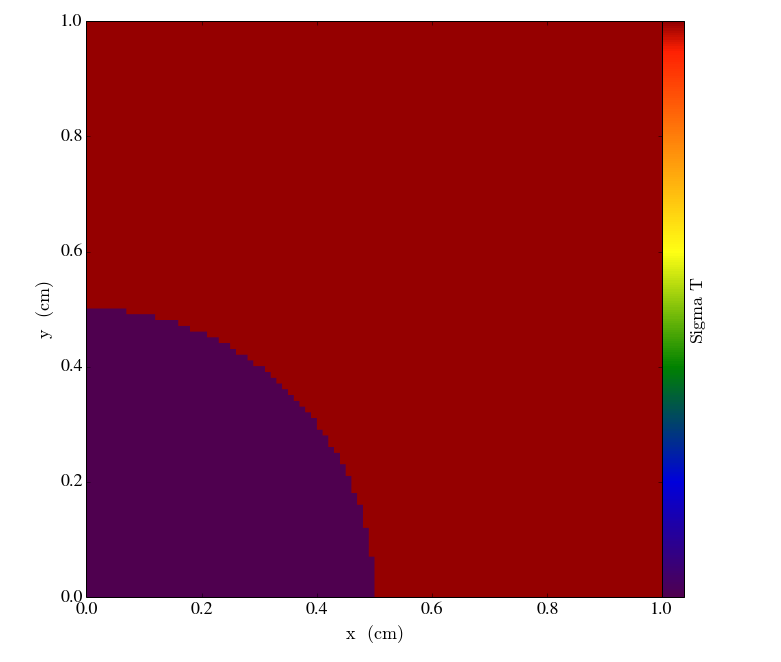

U Content of Mesh: 1732.10345314 grams


In [9]:
# import a few things necessary for plotting in the notebook
from yt.config import ytcfg; ytcfg["yt","suppressStreamLogging"] = "True"
from yt.frontends.moab.api import PyneMoabHex8Dataset
from yt.mods import SlicePlot

# create reactor mesh
m = mesh.Mesh(structured_coords=[np.linspace(0.0, 1.0, 101), np.linspace(0.0, 1.0, 101), [0.0, 1.0]], structured=True)
fuel = material.from_atom_frac({'U235': 0.045, 'U238': 0.955, 'O16': 2.0}, mass=1.0, density=10.7)
cool = material.from_atom_frac({'H1': 2.0, 'O16': 1.0}, mass=1.0, density=1.0)
for i, mat, ve in m:
    coord = m.mesh.get_coords(ve)
    m.mats[i] = fuel if (coord[0]**2 + coord[1]**2) <= 0.5**2 else cool

# create a total cross section tag on the mesh
m.sigma_t = mesh.ComputedTag(lambda mesh, i: sigma_t(mesh.mats[i], group_struct=[10.0, 1e-6], phi_g=[1.0])[0])

# create a uranium mass tag on the mesh
m.u_mass = mesh.ComputedTag(lambda mesh, i: max(mesh.mats[i]['U':'Np'].mass, 0.0))

# plot the total cross section
SlicePlot(PyneMoabHex8Dataset(m), 'z', 'sigma_t', origin='native').display()

# print the total mass of uranium in the reactor mesh
print("U Content of Mesh:", sum(m.u_mass[:]), "grams")


# What could you do with PyNE?

As a **user** you could do your work or research with PyNE.  Even if you have your own software that looks and behaves similarly to some aspects of PyNE, using PyNE will mean that you no longer have to develop AND maintain that functionality.

As a **developer** you should be selfish.  Contribute to PyNE in ways that support the work that you are doing. If a feature you want is not in PyNE right now, chances are that other people want to see that feature too! This will help your future self as much as future other people.

# What goes into PyNE?

Anything that is not export controllable, proprietary, or under HIPAA restrictions!  (If you have questions, ask.)

# Contact PyNE

**Website:** http://pyne.io/

**User's Mailing List:** pyne-users@googlegroups.com

**Developer's List:** pyne-dev@googlegroups.com

# Questions?